1804


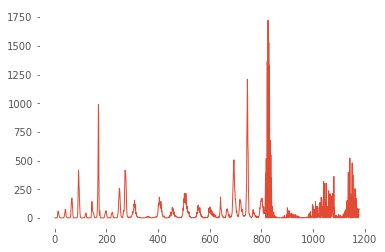

In [233]:
PROVINCE = "50"
import matplotlib.pyplot as plt
count = 0
total_cases = []
with open("total_data.csv") as f:
    for line in f.readlines():
        #print (line)
        if count ==0:
            count +=1
        else:
            line_split = line.split(",")
            
            if line_split[2] == PROVINCE and len(line_split) >=3:
                total_cases.append(float(line_split[3]))
                
print (len(total_cases))
proc_training_data_base = total_cases[(26*20):(len(total_cases) - 26*4)]
plt.plot(proc_training_data_base)
plt.show()

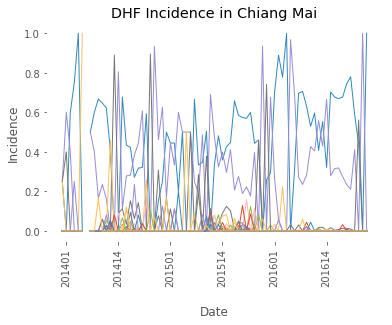

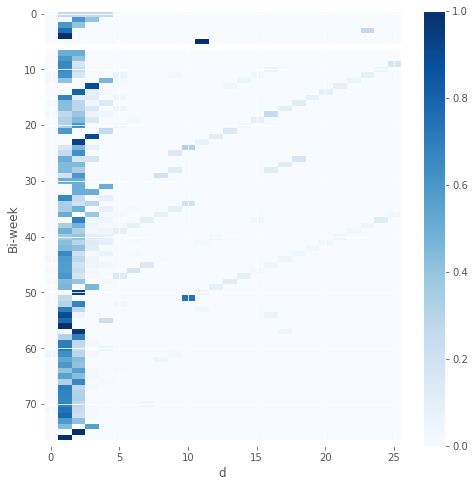

In [258]:
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.rcParams['lines.linewidth']=1
plt.rcParams['axes.facecolor']='w'

n_t_d = []
with open("province-biweek_with_delays.csv") as f:
    i = 0
    for line in f.readlines():
        if i > 0:
            n_t_d.append(line.replace("\n","").split(','))
        i+=1

n_t_d_1 = []

for elm in n_t_d:
    if elm[2] == PROVINCE:
        n_t_d_1.append(elm)


index_to_dates = {}
dates_to_index = {}
count = 0
for i in ["2014","2015","2016"]:
    for j in range(1,27):
        index_to_dates[count] = str(i)+str(j)
        dates_to_index[str(i)+str(j)] = count
        count +=1
        
reporting_matrix = np.zeros((26*3,26*3))

for elm in n_t_d_1:
    try:
        sick_date = elm[0]+elm[1]
        report_date = elm[-2] + elm[-1]
        cases = elm[3]
        reporting_matrix_row = dates_to_index[sick_date] 
        reporting_matrix_col =  dates_to_index[report_date] 
        reporting_matrix[reporting_matrix_row,reporting_matrix_col] = int(cases)
    except:
        pass
np.set_printoptions(suppress=True)    #np.set_printoptions(threshold=np.nan)


D=26
n_t_d = np.zeros((len(reporting_matrix),D))

for i in range(len(reporting_matrix)):
    for j in range(i,i+D):
        try:
            n_t_d[i,j-i] = reporting_matrix[i][j]
        except:
            pass
n_t_d = n_t_d 

from matplotlib.pyplot import cm


def sim_data(x,y,z):
    return n_t_d[:y]

np.savetxt("foo.csv", n_t_d, delimiter=",",fmt='%f')



pos=[]
biweek_x_label = []
for year in ["2014","2015","2016"]:
    for j in np.arange(1,27,13):
        if j <= 9:
               biweek_x_label.append(year + "0"+ str(j))

        else:
               biweek_x_label.append(year +  str(j))
        if year == "2014":
               pos.append(j)
        elif year == "2015":
               pos.append(j+26)
        elif year == "2016":
               pos.append(j+26*2)

p_hat_sim = []

for i in range(len(n_t_d)):
        #print (sum(sim_n_t_d[i]/np.sum(sim_n_t_d[i])))
        p_hat_sim.append(n_t_d[i]/np.sum(n_t_d[i]))


plt.plot(p_hat_sim)
plt.xticks(pos, biweek_x_label, rotation='vertical')
plt.xlabel("\nDate")
plt.title("DHF Incidence in Chiang Mai")
plt.ylabel("Incidence")
plt.show()

plt.figure(figsize=(8,8))
plt.ylabel("Bi-week")
plt.xlabel("d")
plt.imshow(p_hat_sim,aspect='auto',cmap=cm.Blues)
plt.legend()
plt.colorbar()
plt.show()



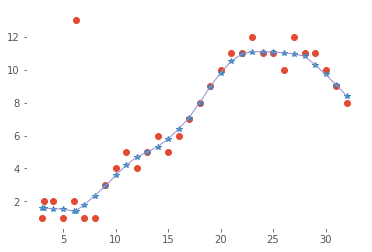

In [259]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
import statsmodels.api as sm

# introduce some floats in our x-values
x = list(range(3, 33)) + [3.2, 6.2]
y = [1,2,1,2,1,1,3,4,5,4,5,6,5,6,7,8,9,10,11,11,12,11,11,10,12,11,11,10,9,8,2,13]

# lowess will return our "smoothed" data with a y value for at every x-value
lowess = sm.nonparametric.lowess(y, x, frac=.3)

# unpack the lowess smoothed points to their values
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

# run scipy's interpolation. There is also extrapolation I believe
f = interp1d(lowess_x, lowess_y, bounds_error=False)

xnew = [i/10. for i in range(400)]

# this this generate y values for our xvalues by our interpolator
# it will MISS values outsite of the x window (less than 3, greater than 33)
# There might be a better approach, but you can run a for loop
#and if the value is out of the range, use f(min(lowess_x)) or f(max(lowess_x))
ynew = f(xnew)


plt.plot(x, y, 'o')
plt.plot(lowess_x, lowess_y, '*')
plt.plot(xnew, ynew, '-')
plt.show()

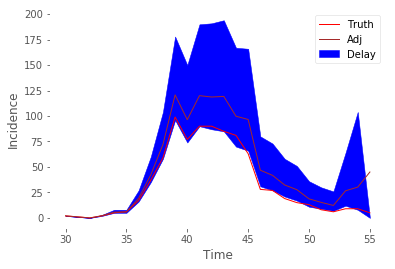

[14.071160436500538, 12.72269730769231]
0.692307692308


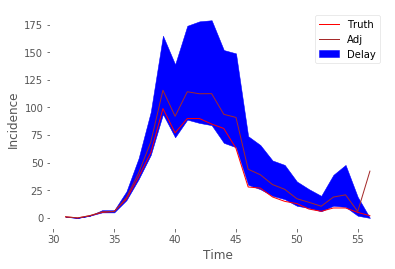

[11.18682317174816, 9.71150230769231]
0.692307692308


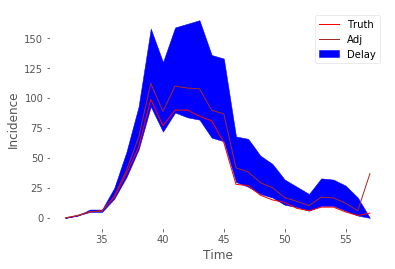

[9.705377685003999, 8.590357307692308]
0.653846153846


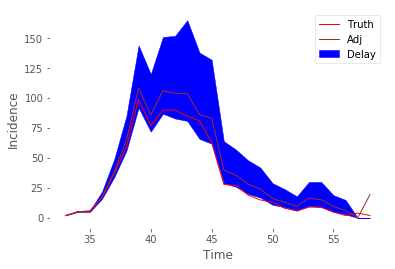

[7.5498273541834635, 6.9591561538461475]
0.692307692308


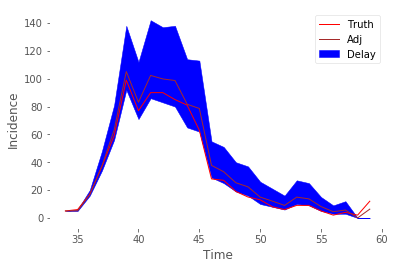

[5.157635541521983, 5.400371153846151]
0.769230769231


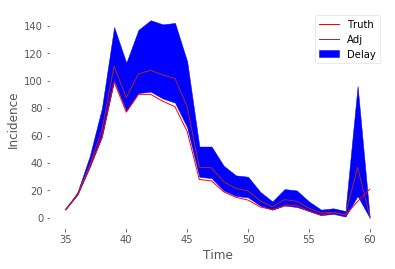

[8.506162313586474, 8.54919730769231]
0.423076923077


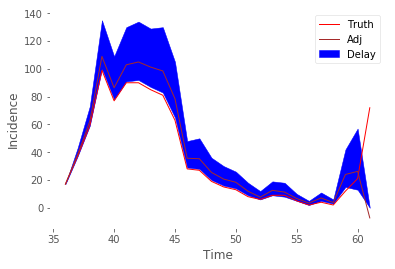

[9.626615436487905, 9.3459323076923]
0.346153846154


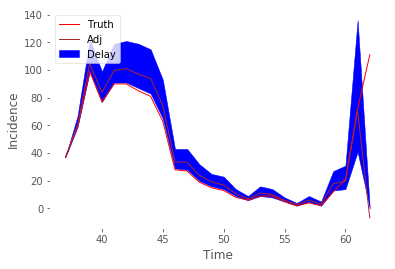

[9.028928950042056, 8.767203461538458]
0.461538461538


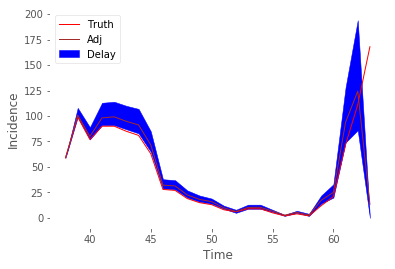

[10.695577351694634, 11.208634615384627]
0.384615384615


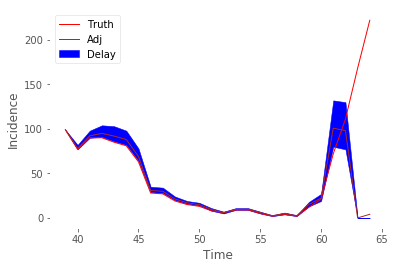

[18.369717595949137, 18.526743076923076]
0.5


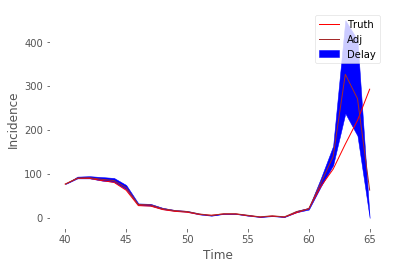

[19.517774496925362, 21.95112192307692]
0.576923076923


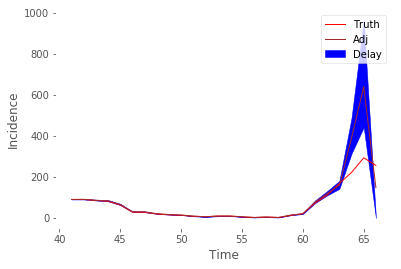

[25.67185545091061, 31.34091615384616]
0.653846153846


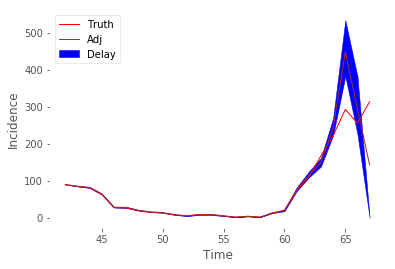

[16.46843504098893, 21.958253076923082]
0.692307692308


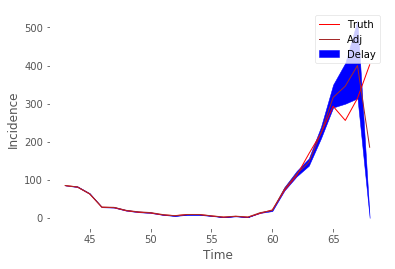

[17.65150652034207, 24.787469615384644]
0.846153846154


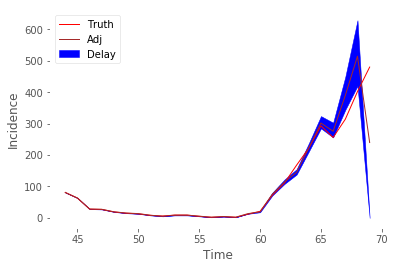

[19.054829819044908, 28.27905615384613]
0.807692307692


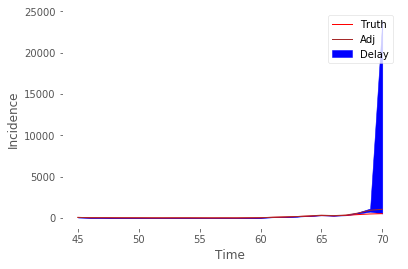

[50.32364827994437, 192.90385692307703]
0.576923076923


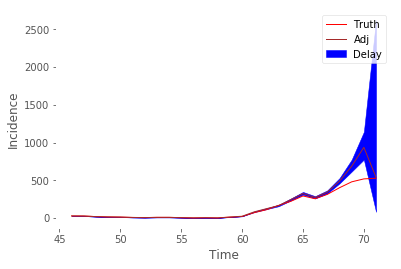

[33.26482947238637, 34.2402757692307]
0.576923076923


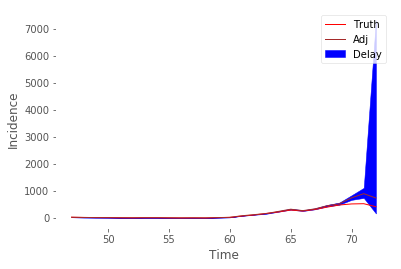

[43.81299548533775, 74.53964999999997]
0.538461538462


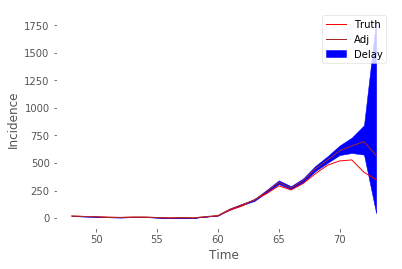

[36.00806146133292, 27.58473653846155]
0.5


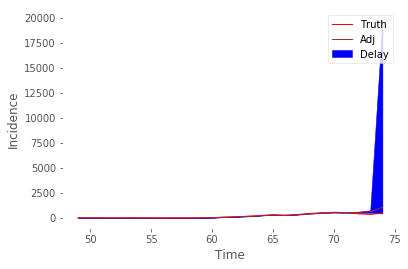

[48.316759124810815, 150.27730000000005]
0.5


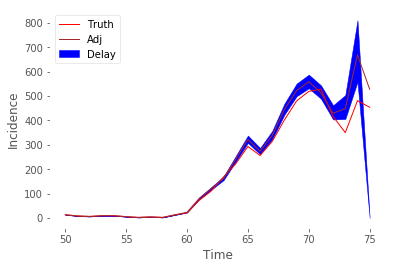

[24.285622187190523, 38.91596038461542]
0.5


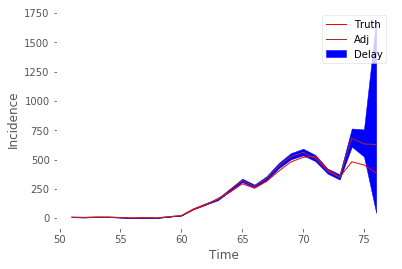

[34.67580694415194, 25.830783076923105]
0.538461538462


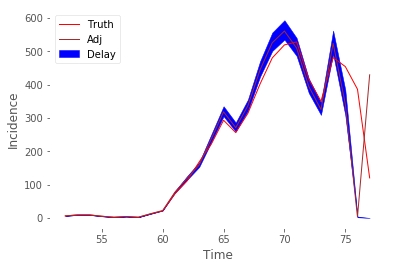

[44.023107952962405, 36.74106769230769]
0.384615384615


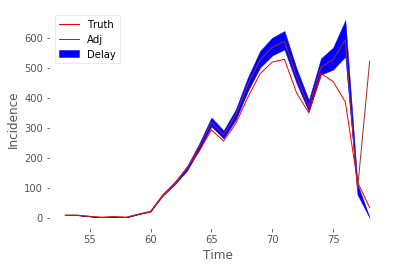

[45.81451830155348, 28.369144230769265]
0.384615384615


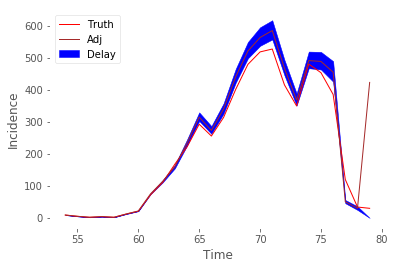

[35.84046770578361, 21.85528846153852]
0.384615384615


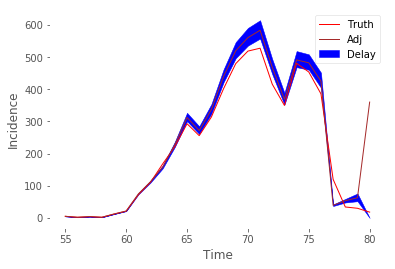

[33.91354283443172, 21.437029999999993]
0.346153846154


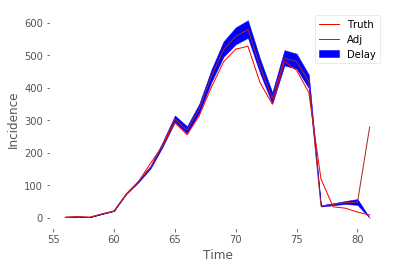

[29.688155027122153, 19.633488076923104]
0.307692307692


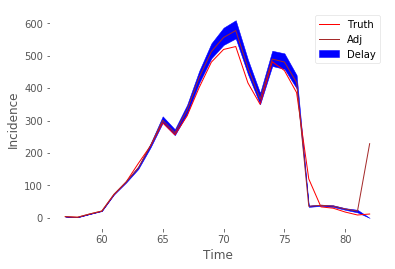

[25.355645039586996, 17.479961153846173]
0.423076923077


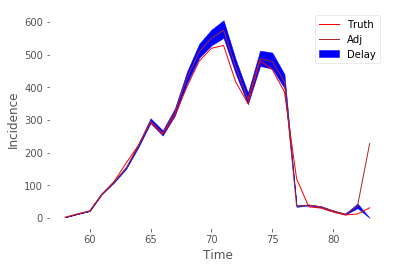

[23.35006302156282, 16.9856953846153]
0.423076923077


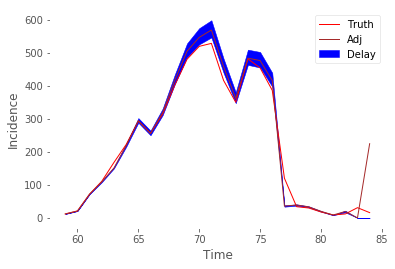

[22.54003997359286, 15.134443461538467]
0.423076923077


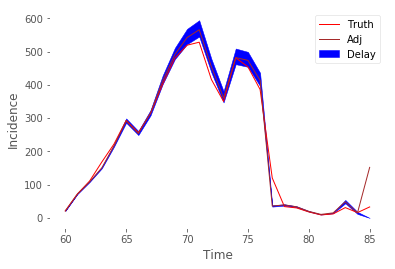

[17.167436601022704, 13.866005769230657]
0.423076923077


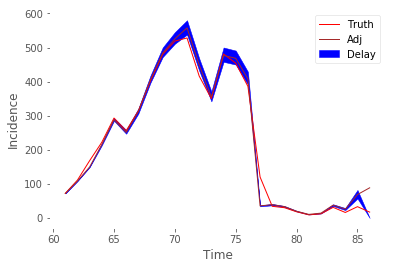

[14.736938332311077, 12.647890384615426]
0.384615384615


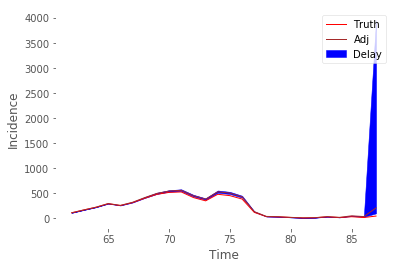

[21.305718424105617, 44.032246153846124]
0.153846153846


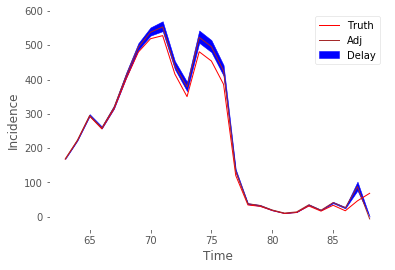

[15.940051333251985, 15.679322307692274]
0.153846153846


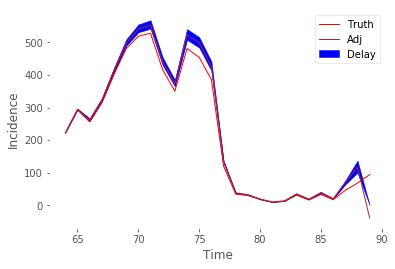

[19.631101480619062, 18.135931538461442]
0.115384615385


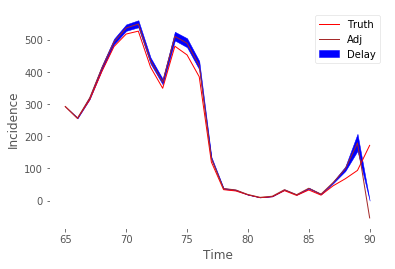

[23.129809807116626, 21.049196923076927]
0.115384615385


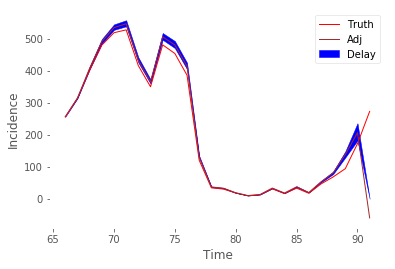

[24.045906841218127, 21.735406153846153]
0.115384615385


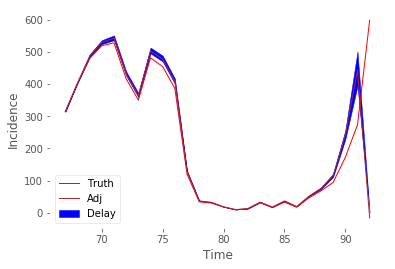

[39.960933912247924, 39.340774230769185]
0.115384615385


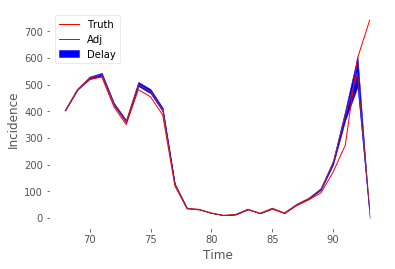

[40.25951963724936, 41.625071538461576]
0.153846153846


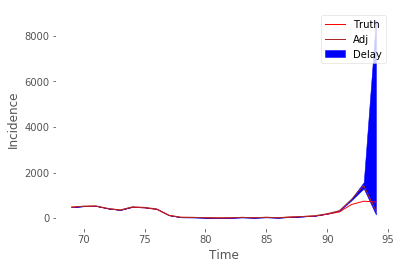

[56.31398827408167, 66.78916807692313]
0.192307692308


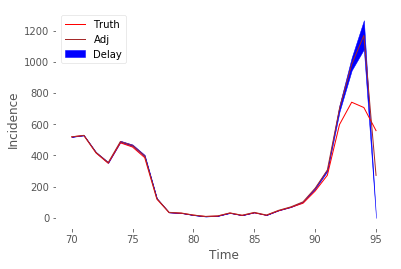

[46.620302116210794, 57.09194692307685]
0.192307692308


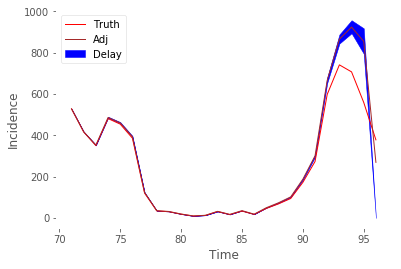

[34.91406524425982, 45.25934038461532]
0.153846153846


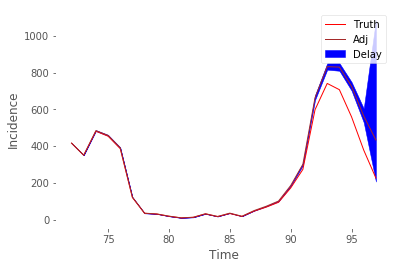

[35.22663874431446, 37.06189153846158]
0.307692307692


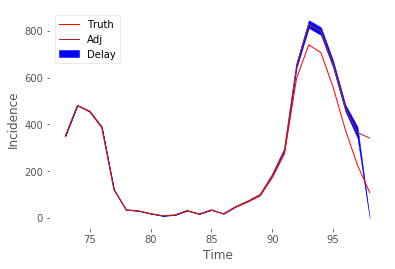

[32.99372539324107, 28.240101153846265]
0.307692307692


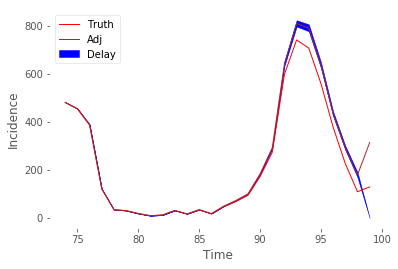

[26.8753241971808, 24.73737115384623]
0.346153846154


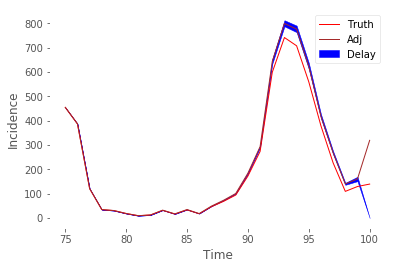

[23.36871879289942, 21.8057984615384]
0.346153846154


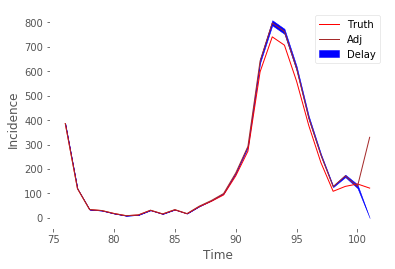

[22.97427708897809, 19.67205038461532]
0.346153846154


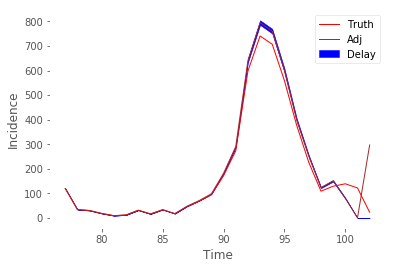

[29.58729269091256, 19.934433461538465]
0.346153846154


In [260]:
from scipy.special import expit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
variance_level_results = []
import sys
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
from sklearn.metrics import mean_squared_error
from pyramid.arima import ARIMA
import GPy
import os
LO=D
rmse_vec_cv = []
#with suppress_stdout():
rmse_vec = []
sim_data_var = []
N_SIM = 1000
sim_results_pi = []
sim_results_mse = []
for sim_num in np.arange(30,len(n_t_d)):
            sim_n_t_d = sim_data(D,sim_num,False)
            train = sim_n_t_d
            


            train = np.array(train)
            train_n_t_d = train.reshape((-1,D))
            ts = train_n_t_d.sum(axis=1)
            data_to_be_scaled_down  = train_n_t_d[len(ts)-D:]




            delayed_data = []
            count = D
            for i in range(len(data_to_be_scaled_down)):
                tmp = data_to_be_scaled_down[i][:count].tolist()
                while len(tmp) <D:
                    tmp.append(0)
                delayed_data.append(tmp)
                count -=1 


            training_data = np.append(train_n_t_d[:len(ts)-D],delayed_data,axis=0)

            k = np.array(train_n_t_d).shape[1 ]
            alphas = np.ones(k)

            for i in range(len(ts)-D):
                alphas += train_n_t_d[i]

            
           
            #######
            # MODEL 1: Delay
            ########
            delay_model_samples = []
            for s_ in range(N_SIM):
                model_1_delay = []
                count = D
                p_vec_noise = np.random.dirichlet(.25*alphas)
                for i in range(len(delayed_data)):
                    delay_forecast = np.sum(delayed_data[i])/np.sum(p_vec_noise[:count])
                    model_1_delay.append(np.round(delay_forecast,2))
                    count -= 1
                delay_model_samples.append(model_1_delay)
            
            delay_model_samples = np.array(delay_model_samples)
            delay_model_samples = np.transpose(np.array(delay_model_samples))
            
            delay_sim_res = delay_model_samples
            LO_delay = delay_sim_res[D-LO:]
            LO_truth = ts[len(ts)-LO:]
           
           # sim_results_mse.append([mean_absolute_error(np.mean(LO_delay,axis=1),LO_truth)])
            delay_cp = 0
            
          
        
            offset = 1
            #kernel = GPy.kern.RBF(input_dim=1, variance=.0001, lengthscale=1.)
            Y = delay_model_samples
            X = []
            for i in range(len(delay_model_samples)):
                X.append(i*np.ones(N_SIM))
            X = np.array(X)
            
            
            from sklearn.linear_model import BayesianRidge#, LinearRegression
            clf = BayesianRidge(compute_score=True)
            clf.fit(np.arange(len(Y)).reshape((-1,1)), np.mean(Y,axis=1).reshape((-1,1)))
            predictMean = clf.predict([len(Y)+1])
            
            
            gpy_traj_samps = []
            for i in range(N_SIM):
                gpy_traj_samps.append(np.random.normal(predictMean,1))
            gpy_traj_samps = np.array(gpy_traj_samps).reshape((offset,N_SIM))
           
        
            gpy_traj = np.append(delay_model_samples[:(D-offset),],gpy_traj_samps,axis=0)
           
           
            LO_delay_low = []
            LO_delay_high = []
            for i in range(LO):
                LO_delay_ci = np.round(np.percentile(LO_delay[i],[2.5,97.5]))
                LO_delay_low.append(LO_delay_ci[0])
                LO_delay_high.append(LO_delay_ci[1])
    
                if LO_delay_ci[0] <= LO_truth[i] <= LO_delay_ci[1]:
                    delay_cp +=1
        
        
        
            plt.fill_between(range(sim_num,LO+sim_num),LO_delay_low,LO_delay_high,alpha=1,color='blue')
            #plt.plot(range(sim_num,sim_num+LO),np.sum(delayed_data,axis=1),color='yellow',alpha=.1)
            plt.plot(range(sim_num,sim_num+LO),LO_truth,color='red')
            plt.plot(range(sim_num,sim_num+LO),np.mean(gpy_traj,axis=1),color='brown')
            plt.legend(("Truth","Adj","Delay"))
            plt.ylabel("Incidence")
            plt.xlabel("Time")
            plt.show()
            
            
            
            
            sim_results_mse.append([mean_absolute_error(LO_truth,np.mean(gpy_traj,axis=1)),mean_absolute_error(LO_truth,np.mean(delay_model_samples,axis=1))])
            print (sim_results_mse[-1])
            #sys.exit()
            #gp_cp = 1.*gp_cp/LO
            #fcast_cp = 1.*fcast_cp/LO
            delay_cp = 1.*delay_cp/LO
            #print (sim_results_mse[-1])
            print (delay_cp)#,fcast_cp,av_cp)
            sim_results_pi.append([delay_cp])

In [263]:
sim_results_mse = np.array(sim_results_mse)
#for i in sim_results_mse:
 #   print(i)
print (sim_results_mse)
print np.mean(sim_results_mse,axis=0)
print np.mean(sim_results_pi)

[[ 14.07116044  12.72269731]
 [ 11.18682317   9.71150231]
 [  9.70537769   8.59035731]
 [  7.54982735   6.95915615]
 [  5.15763554   5.40037115]
 [  8.50616231   8.54919731]
 [  9.62661544   9.34593231]
 [  9.02892895   8.76720346]
 [ 10.69557735  11.20863462]
 [ 18.3697176   18.52674308]
 [ 19.5177745   21.95112192]
 [ 25.67185545  31.34091615]
 [ 16.46843504  21.95825308]
 [ 17.65150652  24.78746962]
 [ 19.05482982  28.27905615]
 [ 50.32364828 192.90385692]
 [ 33.26482947  34.24027577]
 [ 43.81299549  74.53965   ]
 [ 36.00806146  27.58473654]
 [ 48.31675912 150.2773    ]
 [ 24.28562219  38.91596038]
 [ 34.67580694  25.83078308]
 [ 44.02310795  36.74106769]
 [ 45.8145183   28.36914423]
 [ 35.84046771  21.85528846]
 [ 33.91354283  21.43703   ]
 [ 29.68815503  19.63348808]
 [ 25.35564504  17.47996115]
 [ 23.35006302  16.98569538]
 [ 22.54003997  15.13444346]
 [ 17.1674366   13.86600577]
 [ 14.73693833  12.64789038]
 [ 21.30571842  44.03224615]
 [ 15.94005133  15.67932231]
 [ 19.63110148

In [ ]:
from tabulate import tabulate

print np.mean(sim_results_pi,axis=0)
sim_results_mse = np.array(sim_results_mse)

sim_results_mse_formatted = []
for i in range(len(sim_results_mse)):
    sim_results_mse_formatted.append([i+30,sim_results_mse[i][0],sim_results_mse[i][2]])
    
print(tabulate(sim_results_mse_formatted, tablefmt="latex", floatfmt=".2f"))

print np.round(np.mean(sim_results_mse,axis=0))

wins = 0
for i in range(len(sim_results_mse)):
    if sim_results_mse[i][2] < sim_results_mse[i][0]:
        wins +=1
        
print (1.*wins/(len(sim_results_mse)))


In [37]:
from scipy.special import expit
import matplotlib.pyplot as pltq

variance_level_results = []
import sys
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
from sklearn.metrics import mean_squared_error

cv_mse = []
season_data = []
sim_results_mse = []
sim_results_pi = []
for i in range(3):
    season_data.append(n_t_d[i:(i+26)])
    
season_data = np.array(season_data).reshape((3,-1,26))

print (season_data.shape)

for season_for_leave_out in np.arange(3):
        sim_n_t_d = season_data#[:cutoff]

        train = [sim_n_t_d[x] for x in range(3) if x not in [season_for_leave_out]]
        test = sim_n_t_d[season_for_leave_out]
        
        train = np.array(train)
        train_n_t_d = train.reshape((-1,D))
        ts = train_n_t_d.sum(axis=1)

        data_to_be_scaled_down  = test[len(test)-D:]
       
        delayed_data = []
        count = D
        for i in range(len(data_to_be_scaled_down)):
            tmp = data_to_be_scaled_down[i][:count].tolist()
            while len(tmp) <D:
                tmp.append(0)
            delayed_data.append(tmp)
            count -=1 


        training_data = np.append(train_n_t_d[:len(ts)-D],delayed_data,axis=0)

        k = np.array(train_n_t_d).shape[1 ]
        alphas = np.ones(k)

        for i in range(len(ts)-D):
            alphas += train_n_t_d[i]



        #######
        # MODEL 1: Delay
        ########
        delay_model_samples = []
        for s_ in range(N_SIM):
            model_1_delay = []
            count = D
            p_vec_noise = np.random.dirichlet(alphas)
            for i in range(len(delayed_data)):
                delay_forecast = np.sum(delayed_data[i])/np.sum(p_vec_noise[:count])
                model_1_delay.append(np.round(delay_forecast,2))
                count -= 1
            delay_model_samples.append(model_1_delay)

        delay_model_samples = np.array(delay_model_samples)


        #######
        # MODEL 2 : Forecast
        ########

        LO=D
        process_training_data = np.append(ts[:len(ts)-D],model_1_delay[:D-LO],axis=0)
        from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
        myDLM = dlm(process_training_data)
       # myDLM = myDLM + seasonality(26, name='7day', w=1.0)
        myDLM = myDLM + autoReg(degree=2, data=process_training_data, name='ar2', w=1.0)
        myDLM.fit()
        (process_model_forecast, predictVar) = myDLM.predictN(N=LO, date=myDLM.n-1)

        #######
        # MODEL 2
        ########
        forecast_model_samples = []
        for s_ in range(N_SIM):
            model_2_delay = []
            count = D
            for i in np.arange(LO,0,-1):
                tmp = np.random.normal(process_model_forecast[LO-i],np.sqrt(predictVar[LO-i]))
                model_2_delay.append(np.round(tmp,2))
                count -= 1

            forecast_model_samples.append(np.append(model_1_delay[:D-LO],model_2_delay))

        forecast_model_samples = np.array(forecast_model_samples)


        model_average = bayes_estimate_prob(np.sum(delayed_data,axis=1),forecast_model_samples,alphas,LO,N_SIM)
            
        delay_model_samples = np.transpose(np.array(delay_model_samples))
        forecast_model_samples = np.transpose(np.array(forecast_model_samples))
            
        delay_sim_res = delay_model_samples
        fcast_sim_res = forecast_model_samples
        avg_sim_res = model_average
        LO_av = np.array(avg_sim_res).reshape((LO,-1))
        LO_delay = delay_sim_res[D-LO:]
        LO_fcast = fcast_sim_res[D-LO:]
        LO_truth = ts[len(ts)-LO:]
        #print (np.mean(LO_delay,axis=1),np.mean(LO_fcast,axis=1),LO_truth\
               #,np.mean(LO_av,axis=1))
        #sys.exit()
        sim_results_mse.append([mean_absolute_error(np.mean(LO_delay,axis=1),LO_truth),\
                               mean_absolute_error(np.mean(LO_fcast,axis=1),LO_truth),\
                               mean_absolute_error(np.mean(LO_av,axis=1),LO_truth)])
        print (sim_results_mse[-1])
        av_cp = 0
        fcast_cp = 0
        delay_cp = 0
        for i in range(LO):
            LO_av_ci = np.round(np.percentile(LO_av[i],[2.5,97.5]))
            LO_fcast_ci = np.round(np.percentile(LO_fcast[i],[2.5,97.5]))
            LO_delay_ci = np.round(np.percentile(LO_delay[i],[2.5,97.5]))
            print (LO_delay_ci,LO_fcast_ci,LO_av_ci, LO_truth[i])
            if LO_av_ci[0] <= LO_truth[i] <= LO_av_ci[1]:
                av_cp +=1

            if LO_fcast_ci[0] <= LO_truth[i] <= LO_fcast_ci[1]:
                fcast_cp +=1

            if LO_delay_ci[0] <= LO_truth[i] <= LO_delay_ci[1]:
                delay_cp +=1


        av_cp = 1.*av_cp/LO
        fcast_cp = 1.*fcast_cp/LO
        delay_cp = 1.*delay_cp/LO

        print (delay_cp,fcast_cp,av_cp)
        sim_results_pi.append([delay_cp,fcast_cp,av_cp])

(3, 26, 26)
Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
[15.051926923076925, 32.414211538461544, 14.958975435630133]
(array([4., 4.]), array([-20.,  34.]), array([4., 4.]), 5.0)
(array([5., 5.]), array([-18.,  29.]), array([5., 5.]), 4.0)
(array([5., 5.]), array([-16.,  27.]), array([5., 5.]), 2.0)
(array([3., 3.]), array([-23.,  20.]), array([3., 3.]), 1.0)
(array([2., 2.]), array([-23.,  21.]), array([2., 2.]), 0.0)
(array([1., 1.]), array([-27.,  26.]), array([1., 1.]), 2.0)
(array([0., 0.]), array([-25.,  25.]), array([0., 0.]), 5.0)
(array([2., 2.]), array([-26.,  25.]), array([2., 2.]), 6.0)
(array([5., 5.]), array([-25.,  22.]), array([5., 6.]), 17.0)
(array([5., 5.]), array([-26.,  24.]), array([5., 6.]), 37.0)
(array([16., 17.]), array([-21.,  26.]), array([14., 19.]), 59.0)
(array([36., 37.]), array([-24.,  26.]), array([30., 43.]), 99.0)
(array([58., 60.]), array([-27.,  20.]), array([48., 71.]), 77.0

In [39]:

#### sim_results_pi = np.array(sim_results_pi)#### sim 
print np.mean(sim_results_pi,axis=0)

sim_results_mse = np.array(sim_results_mse)
print np.round(np.mean(sim_results_mse,axis=0)/1)

[0.1025641  0.58974359 0.37179487]
[11. 32. 11.]
